In [2]:
from gensim import corpora
from parameters import *
from NLP_preprocessing import *
from LDA_model import *
from utils import *
import warnings
warnings.filterwarnings('ignore')


#read dataset, only keep desired text column and rename it
data = read_data(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)
cleaned_text = process_text_col(data, text_col = RENAMED_TEXT_COL)  # processed Text Data

# Create Dictionary
id2word = corpora.Dictionary(cleaned_text)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cleaned_text]

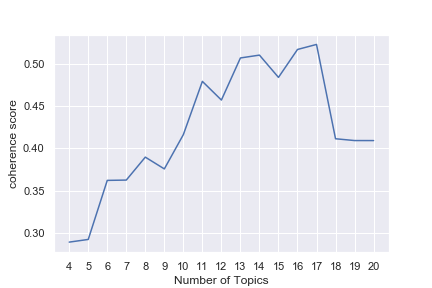

In [2]:
# coherence_vs_topics(method = 'LDA', texts= cleaned_text,corpus = corpus, dictionary = id2word ,min_number_topics = 4, max_number_topics = 20)

from IPython.display import Image
Image('../out/coherence_Topics_plot_LDA.png')

In [3]:
NUM_TOPICS = 14
lda_model = topic_modeling(method = 'LDA', num_topics = NUM_TOPICS, corpus = corpus , dictionary = id2word)

In [4]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -9.891973682845649


In [4]:
#14 topics

pd.set_option('display.max_colwidth', 100)
df_dominant_topic = format_topics_sentences(model=lda_model, corpus=corpus, texts=cleaned_text)
df_dominant_topic.head()


df_dominant_topic.Dominant_Topic.value_counts()

5.0     1458
4.0      984
8.0      548
3.0      530
13.0     494
0.0       97
10.0      31
1.0       18
11.0       3
2.0        2
12.0       1
9.0        1
7.0        1
6.0        1
Name: Dominant_Topic, dtype: int64

In [5]:
df_dominant_topic[round(df_dominant_topic.Topic_Perc_Contrib,4) == round(1/NUM_TOPICS, 4)] #Classify them as other --42 answears 

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
129,6.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling",[hate]
159,11.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling",[ready]
478,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling",[load]
628,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling","[clearly, lay]"
731,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling","[updates, answer_question]"
754,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling",[updates]
843,0.0,0.0714,"answer, question, unclear, issue, people, security_question, taking_long, mark, little, room",[]
894,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling","[understanding, content]"
974,1.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling","[shitty, period]"
1076,11.0,0.0714,"mind, answer_question, user_friendly, repeat, browser, value, mac, multiple, content, misspelling",[good]


In [6]:
len(df_dominant_topic[round(df_dominant_topic.Topic_Perc_Contrib,4) < 0.1])

42

In [7]:
df_dominant_topic['Topic_final'] = np.where(df_dominant_topic.Topic_Perc_Contrib < 0.1, 99, df_dominant_topic.Dominant_Topic)
df_dominant_topic.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Topic_final
0,13.0,0.8517,"time, say, log, page, error, assessment, ask, work, add, thing","[find, gst, assessment, log, time, setup, print, blank, page, say, page, print, print, page, bla...",13.0
1,13.0,0.2143,"time, say, log, page, error, assessment, ask, work, add, thing","[dissatisfied, time, table, reassessment, taxis]",13.0
2,3.0,0.4165,"receive, document, site, submit, reassessment, login, email, go, option, letter","[site, user_friendly, specially, people, accustomed, use, computer]",3.0
3,3.0,0.8144,"receive, document, site, submit, reassessment, login, email, go, option, letter","[option, login, canada, site, feel, hide]",3.0
4,4.0,0.6340,"information, account, date, look, available, access, wait, tell, instalment, get","[access, spouse, wife, account, representative, living, czech, republic, easy, reach, phone, exp...",4.0


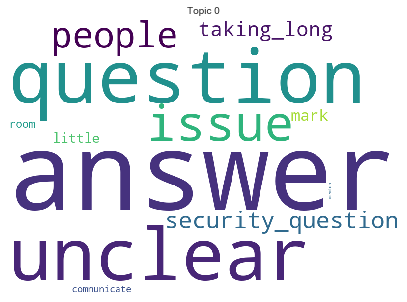

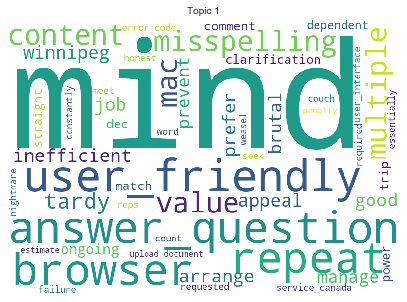

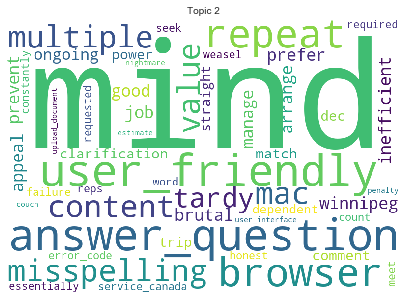

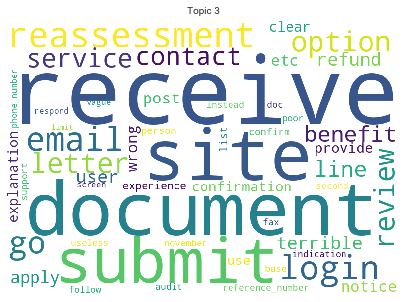

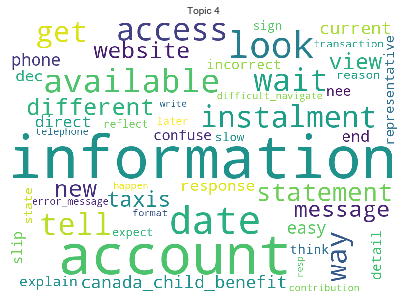

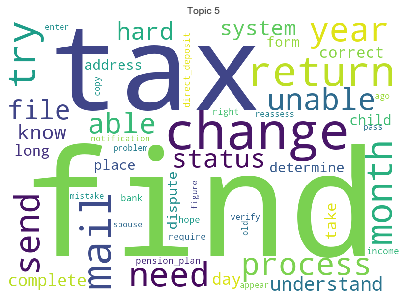

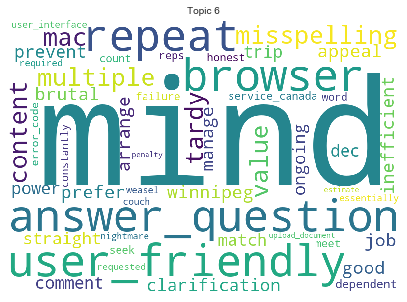

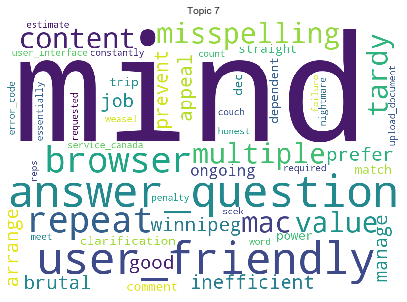

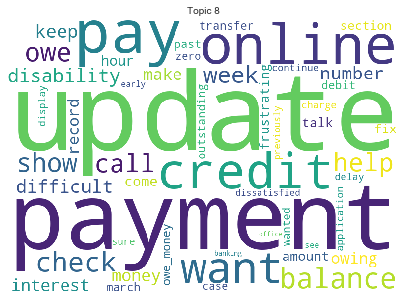

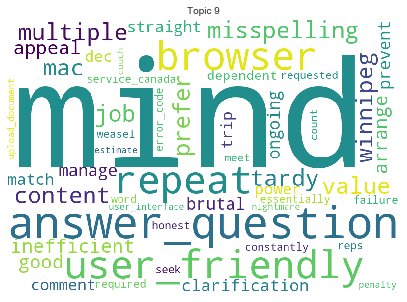

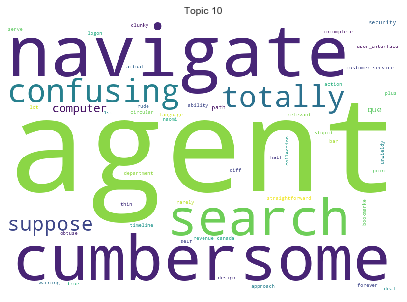

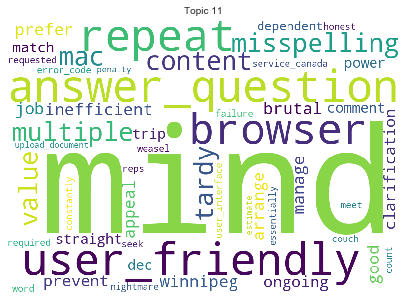

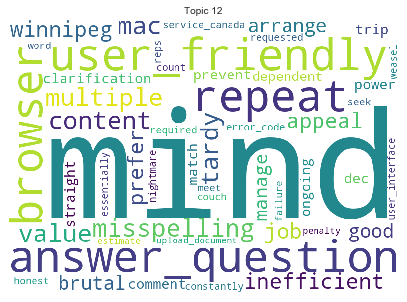

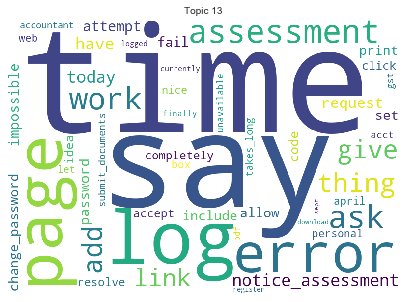

In [8]:
#Wordcloud 
get_wordcloud(model = lda_model, num_topics = NUM_TOPICS)

In [15]:
# sentences_chart(ldamodel=lda_model, corpus=corpus, start = 0, end = 16)
# Plot_topic_dist(ldamodel= lda_model, num_topics = NUM_TOPICS, corpus = corpus)
# tsne_plot(ldamodel = lda_model, corpus = corpus,num_topics = NUM_TOPICS , Keep_well_separated_pcnt = 0.30)

In [10]:
pyldavis_plot(model = lda_model ,corpus = corpus, mds = "mmds") #,  mds = "tsne"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.476132  0.160631       1        1  28.978098
4     -0.317294  0.346034       2        1  19.709101
8     -0.043374  0.438103       3        1  13.873641
3     -0.480231  0.028862       4        1  13.745110
13     0.221305  0.355563       5        1  12.407269
0      0.250050 -0.166293       6        1   2.447147
10    -0.189897 -0.194823       7        1   1.808784
12     0.011902 -0.138297       8        1   1.004408
11     0.011902 -0.138297       9        1   1.004408
9      0.011902 -0.138297      10        1   1.004408
7      0.011902 -0.138297      11        1   1.004408
6      0.011902 -0.138297      12        1   1.004408
2      0.011902 -0.138297      13        1   1.004408
1      0.011902 -0.138297      14        1   1.004408, topic_info=             Term        Freq       Total Category  logprob  loglift
87    information  941.000000  941.000000  Default  30.0000  30.0000
28        account  837.000000  837.000000  Default  29.0000  29.0000
2            find  951.000000  951.000000  Default  28.0000  28.0000
47        receive  460.000000  460.000000  Default  27.0000  27.0000
40         update  409.000000  409.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
210           dec    0.118389   70.437111  Topic14  -7.8988  -1.7877
2661     winnipeg    0.118389    1.427041  Topic14  -7.8988   2.1114
224     dependent    0.118389    1.445631  Topic14  -7.8988   2.0984
493          word    0.118389    1.447159  Topic14  -7.8988   2.0974
1649       appeal    0.118389    1.473880  Topic14  -7.8988   2.0791

[907 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
274       1  0.995127     able
27        2  0.995806   access
28        2  0.998304  account
508       5  0.991499      add
537       1  0.982377  address
...     ...       ...      ...
205       2  0.984960  website
238       3  0.988522     week
94        5  0.991687     work
647       4  0.981970    wrong
176       1  0.995863     year

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 9, 4, 14, 1, 11, 13, 12, 10, 8, 7, 3, 2])

In [11]:
pyldavis_plot(model = lda_model ,corpus = corpus, mds = "tsne")

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
5        1.425140 -203.131439       1        1  28.978151
4       93.696953  -55.018154       2        1  19.709101
8      141.694016   25.320429       3        1  13.873644
3     -126.233505    5.739788       4        1  13.744948
13     -59.868134  101.519302       5        1  12.407360
0      151.966629  133.119141       6        1   2.447152
10      12.542690 -101.441658       7        1   1.808792
12      49.372585   57.773476       8        1   1.004410
11     203.505997  -84.541840       9        1   1.004410
9      119.923477 -166.068970      10        1   1.004410
7      -19.315592   -8.882428      11        1   1.004410
6      -95.841057 -109.373474      12        1   1.004410
2       37.554749  165.057098      13        1   1.004410
1      243.648911   32.733547      14        1   1.004410, topic_info=             Term        Freq       Total Category  logprob  loglift
87    information  941.000000  941.000000  Default  30.0000  30.0000
28        account  837.000000  837.000000  Default  29.0000  29.0000
2            find  951.000000  951.000000  Default  28.0000  28.0000
47        receive  460.000000  460.000000  Default  27.0000  27.0000
40         update  409.000000  409.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
210           dec    0.118389   70.437157  Topic14  -7.8988  -1.7877
2661     winnipeg    0.118389    1.427043  Topic14  -7.8988   2.1114
224     dependent    0.118389    1.445633  Topic14  -7.8988   2.0984
493          word    0.118389    1.447161  Topic14  -7.8988   2.0974
1649       appeal    0.118389    1.473882  Topic14  -7.8988   2.0791

[886 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
274       1  0.995126     able
27        2  0.995806   access
28        2  0.998305  account
508       5  0.991492      add
537       1  0.982375  address
...     ...       ...      ...
205       2  0.984960  website
238       3  0.988522     week
94        5  0.991680     work
647       4  0.981981    wrong
176       1  0.995861     year

[169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 9, 4, 14, 1, 11, 13, 12, 10, 8, 7, 3, 2])

In [13]:
top3_topics = top3_topics_per_document(model = lda_model, corpus = corpus)

org_data = read_data_meta(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE , other_cols = cols)

assert top3_topics.shape[0] == data.shape[0] == org_data.shape[0]

merged = pd.concat([org_data, df_dominant_topic, top3_topics.loc[:, ['Second_Topic', 'Third_Topic']]], axis=1 , ignore_index = False)
merged['Topic_final'].value_counts()

5.0     1458
4.0      984
8.0      548
3.0      530
13.0     494
0.0       84
99.0      42
10.0      29
Name: Topic_final, dtype: int64

In [ ]:
# merged.to_csv(os.path.join(out_dir, 'df_with_topics_dissatisfaction_reason.csv')

In [14]:
#see 20 samples for each class

for i in [5,4,8,3,13,10, 99]: 
    print(f'Some examples for topic {i}')
    print('')
    
    samples = merged.loc[merged['Topic_final'] == i , ['Topic_Perc_Contrib','dissatisfaction_reason']].sort_values(by=['Topic_Perc_Contrib'] , ascending=False).head(20)
    print(samples['dissatisfaction_reason'].values)
    print(" ****************")

Some examples for topic 5

['As non-resident I am unable to file my return electronically. Unable to see the progress status of my return.'
 'My tax return has taken 5 months to be processed. Unacceptable. It is still "being processed".'
 'not possible to find out why my income tax report is "in progress" status for so long'
 'Not understanding why it takes 4 or more months to process return, T1 General with 3 reciepts not very complicated.'
 'Process status has not changed, leaves me wondering if there is progress'
 'No evidence of T1135 submission found (sent in by regular mail as filing from abroad)'
 'My 2017 return has had the status "your return is being processed" for over 2 months now!'
 'we can not see why income tax return is still in process after 2 months'
 "I was hoping to e file my 2016 tax return but I couldn't figure out how to do it."
 'Its taken almost 5 months for the cra to finish my tax return'
 'My 2016 tax return has been “in process” for atleast 4 months and it 

In [ ]:
# save_vec_lda(lda_model, corpus, 14)